<img src="Film.jpg" alt="Trulli" width="500" height="333">



 <h1 style="text-align:center;">Data Analysis Project 2 - Investigate a Dataset (TMDb Movie Dataset)
</h1>
 
  <img src="Udacity.png" alt="Trulli" width="500" height="333">
  

   <h1 style="text-align:center;"> Student Name: Tadhi Al-Ali</h1>

   <h1 style="text-align:center;">Submit Date: Sunday, 29 September</h1>


## Table of Contents

<ul style="list-style-type:none;"> 
<p><a href="#intro">Introduction</a></p>
    
<p><a href="#wrangling">Data Wrangling</a></p>

<p><a href="#eda">Exploratory Data Analysis</a></p>

<p><a href="#conclusions">Conclusions </a></p>
</ul>

<a id='intro'></a>
## Introduction


>In this project, I will analyze a dataset and then communicate with my findings. I have to use Python libraries NumPy, pandas, and Matplotlib to make my analysis on the dataset easier. I choose the TMDb movie dataset which contains information about 10,000 movies collected in the movie database (TMDb). It’s originally come from Kaggle which was cleaned and provided by Udacity that includes movie information such as popularity, budget, cast, user rating, revenue and vote average. 

## Objectives
>The main concept of this project is to through the data analysis techniques based in the following steps:

><li>Ask questions</li>
><li>Data wrangling</li>
><li>Exploratory data analysis</li>
><li>Conclusion</li>

## Questions

>These are the questions that I analyzed from the dataset:
><ol>
    <li>What is the movie with the highest and lowest budget?</li>
    <li>Which movie made the highest revenue and lowest?</li>
    <li>What is the movie with the shortest and longest runtime?</li>
    <li>What is the most and least profit earned in the movies?</li>
    <li>Which movie has the highest or lowest profit earned?</li>
    <li>What is the average runtime of movies from year to year?</li>
    <li>Which genres have the highest release of movies?</li>
    

</ol> 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis, I will keep only relevant data and deleting the unused data so that I can make my calculation easy and understandable.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable 'tmdb-movies.csv'
df = pd.read_csv('tmdb-movies.csv')
#printing first five rows with defined columns of tmdb-movies database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


<h4>Observation from the dataset:</h4>

-	There is no unit currency in columns such as budget, budget_adj, revenue, and revenue_adj. So, as the international currency in the dollar, I will assume the currency in the dollar in the dataset.  

-	The budget or revenue have a value of zero where the dataset contains lots of movies.



<h4>See the column information and null values in the dataset:</h4>

In [3]:
# This displays a concise summary of the dataframe,
# Including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>In this dataset, I use ‘info’ to find information about it. After I look at the information on the dataset, I figure out that there is a lot of null value like the cast, id, home page, tagline, director, genres, keyword, and etc.

<h4>See the descriptive statistics for the dataset:</h4>

In [4]:
# This returns useful descriptive statistics for each column of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>I figure out there are a lot of zero in the budget and revenue column in the dataset. So, I have to look for zero values by count total rows in each column which contain null values and fill the null values with zero using 'fillna' function.


In [5]:
#count total rows in each column which contain null values
df.isna().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#fill the null values with zero using 'fillna' function
df.fillna(0)
print()



### Data Cleaning (by deleting unused information from the dataset)<h4>Cleaning observation process:</h4>
><ol>
    <li>Remove the unwanted columns such as, id, imdb_id, popularity, homepage, keywords
, overview, production_companies, vote_count, vote_average, budget_adj, and revenue_adj.</li>
    <li>Remove the duplicate rows from the dataset.</li>
    <li>Drop the null values.</li>
    <li>Remove the movies in the database have zero budget or zero revenue.</li>
    <li>Changing format of release date into datetime format.</li>
    <li>Replacing zero with NAN in runtime column.</li>
    <li>Changing the format of budget and revenue column.</li>
    
   

</ol> 

<h4>1. Remove the unwanted columns:</h4>

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Creating a list to delete the column

delete_column=['id','imdb_id', 'popularity', 'homepage', 'keywords', 'overview',
               'production_companies','vote_count', 'vote_average', 'budget_adj', 'revenue_adj']

#Then, delete the unwanted columns by using drop function 
df.drop(delete_column, axis=1, inplace=True)

In [8]:
#Show the dropped dataset
df.head(5)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,04/01/2015,2015


<h4>2. Remove the duplicate rows from the dataset:</h4>

In [9]:
# check for duplicates in the data
sum(df.duplicated())

1

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

<h4>3. Drop the null values:</h4>

In [12]:
df.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [13]:
#drop null values
df.dropna(how = 'any',inplace = True)

In [14]:
#see if null values are dropped
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [15]:
df.shape

(8001, 10)

<h4>4. Remove the movies in the dataset have zero budget or zero revenue:</h4>

In [16]:
# First, creating a seperate list of revenue and budget column
RB_list=['budget', 'revenue']
# Second, replace all the value from zero to NAN in the list
df[RB_list] = df[RB_list].replace(0, np.NAN)
#Then, remove all the row which has NaN value in RB_list
df.dropna(subset = RB_list, inplace = True)

In [17]:
# Checking for an zero values in the budget and revenue columns
print("Rows with '0' values in Budget column:",df[(df['budget']==0)].shape[0])
print("Rows with '0' values in Revenue column:",df[(df['revenue']==0)].shape[0])

Rows with '0' values in Budget column: 0
Rows with '0' values in Revenue column: 0


<h4>5. Changing format of release date into datetime format:</h4>

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [19]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<h4>6. Replacing zero with NAN in runtime column:</h4>

In [20]:
df['runtime'] = df['runtime'].replace(0, np.NAN)
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<h4>7. Changing the format of budget and revenue column:</h4>

In [21]:
#Show the data type of the data set
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [22]:
#changing data type of budget and revenue from float to int

C = ['budget', 'revenue']
df[C] =df[C].applymap(np.int64)

# Cheak the new data type
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 10 columns):
budget            3572 non-null int64
revenue           3572 non-null int64
original_title    3572 non-null object
cast              3572 non-null object
director          3572 non-null object
tagline           3572 non-null object
runtime           3572 non-null int64
genres            3572 non-null object
release_date      3572 non-null datetime64[ns]
release_year      3572 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 307.0+ KB


>The information of dataset shows that, there is 3572 entries and 10 columns.

<a id='eda'></a>
## Exploratory Data Analysis



><h4>1. What is the movie with the highest and lowest budget?</h4>

In [24]:
import pprint
#defining the function
def calculate(column):
    
#For highest earned profit
    high = df[column].idxmax()
    high_details = pd.DataFrame(df.loc[high])
    
#For lowest earned profit
    low = df[column].idxmin()
    low_details = pd.DataFrame(df.loc[low])
    
#Collecting data in one place
    info = pd.concat([high_details, low_details], axis=1)
    
    return info


#Calling the function I need
calculate('budget')



,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999



 <li>The 2244 column shows the largest budget for example, 425000000 dollar.</li>
 <li> The 2618 column shows the lowest budget for example, 1 dollar.</li>

><h4>2. Which movie made the highest revenue and lowest?</h4>

In [25]:
#using the same function "calculate ""(name of the column)"" to figure out the highest and lowest revenue
calculate('revenue')

,1386,8142
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00
release_year,2009,1995



 <li>The 1386 column shows the largest revenue for example, 2781505847	 dollar.</li>
 <li> The 8142 column shows the lowest revenue for example, 2 dollar.</li>

><h4>3. What is the movie with the shortest and longest runtime?</h4>

In [26]:
#using the same function calculate ""(name of the column)"" to figure out the shortest and longest runtime of the movie
calculate('runtime')

,2107,8005
budget,18000000,3000000
revenue,871279,21000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation
release_date,2010-05-19 00:00:00,1983-10-19 00:00:00
release_year,2010,1983


 <li>The 2107 column shows the longest runtime for example, 338 minutes.</li>
 <li> The 8005 column shows the shortest runtime for example, 26 minutes.</li>

><h4>4. What is the most and least profit earned in the movies?</h4>


In [27]:
#To know which movies had most and least profit
# I have to insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
# to clculate the profit of the each movie
df.insert(2,'profit_earned',df['revenue']-df['budget'])

# view the changes in the dataset
df.head(2)


,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [28]:
#using the same function calculate ""(name of the column)"" 
#to figure out the most and least profit of the movie
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


<li>The 1386 column shows the most earned profit for example, 2544505847.</li>
<li> The 2244 column shows the least earned profit for example, -413912431.</li>

><h4>5. Which movie has the highest or lowest profit earned?</h4>

In [29]:

def find_minmax(x):
    #I use the function 'idmin' to find the index of lowest profit movie
    min_index = df[x].idxmin()
     
    #then, I use the function 'idmax' to find the index of Highest profit movie
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #Finally, I print the movie with high and low profit
    print("Movie which has highest "+ x + ":",df['original_title'][high_index])
    print("Movie which has lowest "+ x + ":",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

# and use find_minmax function
find_minmax('profit_earned')

Movie which has highest profit_earned: Avatar
Movie which has lowest profit_earned: The Warrior's Way


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


><h4>6. What is the average runtime of movies from year to year?</h4>

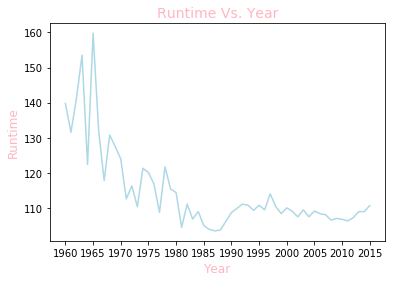

In [30]:
# First, make the group of the data according to their release_year 
#and find the mean and plot

df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2017,5) , color='lightblue')

#second, I setup the figure size 
sns.set(rc={'figure.figsize':(10,5)})

#then, I setup the title of the figure
plt.title("Runtime Vs. Year",  color='lightpink', fontsize = 14)

#finally, I set the x, y label and style sheet

plt.xlabel('Year', color='lightpink', fontsize = 12)
plt.ylabel('Runtime', color='lightpink', fontsize = 12)
sns.set_style("whitegrid")





<li>Based on the runtime vs.Year graph, the line chart shows that the movie duration decreasing year by year. Therefore, the average runtime duration of the movies are around 110 Minutes.</li>

><h4>7. Which genres have the highest release of movies?</h4>

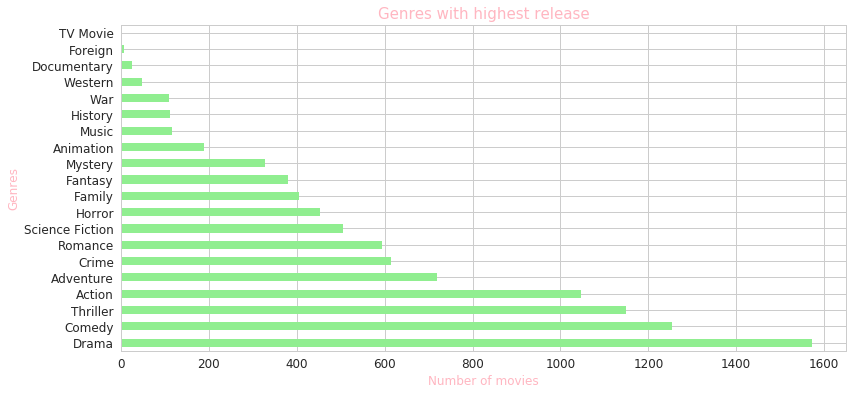

In [31]:

#Firstly, I have to make a function that will split the string 
#and return the count of each genres:
def count_genre(x):
    #then, concatenate all the rows of the genrs
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #and conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#Secondly, I call the function for counting the movies of each genres
total_genre_movies = count_genre('genres')

#therefor, I plot a 'barh' using plot function for 'genres vs number of movies'
total_genre_movies.plot(kind = 'barh',figsize = (13,6), fontsize=12, color='lightgreen')

#Finally, I setup the title of the figure, the x, y label and style sheet
plt.title("Genres with highest release",  color='lightpink', fontsize=15)
plt.xlabel('Number of movies', color='lightpink', fontsize=12)
plt.ylabel("Genres", color='lightpink', fontsize= 12)
sns.set_style("whitegrid")

<li>Based on the Genres with highest release graph, the line barh shows that the drama geners has the highest release of movies.</li>

<a id='conclusions'></a>
## Conclusions

>Finally, in the following list you can see the summarize of my findings for the results that have been performed of dataset analysis:


 >What is the movie with the highest and lowest budget?
  <ul style="list-style-type:none;">
    <li> The 2244 column shows the largest budget for example, 425000000 dollar.</li>
    <li>The 2618 column shows the lowest budget for example, 1 dollar.</li>
</ul> 
  
  >Which movie made the highest revenue and lowest?
    <ul style="list-style-type:none;">
     <li>The 1386 column shows the largest revenue for example, 2781505847 dollar.</li>
 <li> The 8142 column shows the lowest revenue for example, 2 dollar.</li>
    </ul>
    
   >What is the movie with the shortest and longest runtime?
     <ul style="list-style-type:none;">
     <li>The 2107 column shows the longest runtime for example, 338 minutes.</li>
 <li> The 8005 column shows the shortest runtime for example, 26 minutes.</li>
    </ul>
    
   >What is the most and least profit earned in the movies?
    <ul style="list-style-type:none;">
   <li>The 1386 column shows the most earned profit for example, 2544505847.</li>
    <li> The 2244 column shows the least earned profit for example, -413912431.</li>
     </ul>
   
   >Which movie has the highest or lowest profit earned?
   <ul style="list-style-type:none;">
    <li>Movie which has highest profit_earned: Avatar</li>
    <li>Movie which has lowest profit_earned: The Warrior's Way</li>
    </ul>

   >What is the average runtime of movies from year to year?
    <ul style="list-style-type:none;">
    <li>Based on the runtime vs.Year graph, the line chart shows that the  movie duration decreasing year by year. Therefore, the average runtime duration of the movies are around 110 Minutes.</li>
    </ul>
 
   >Which genres have the highest release of movies?
    <ul style="list-style-type:none;"> 
    <li>Based on the Genres with highest release graph, the line barh shows that the drama geners has the highest release of movies.</li>
    </ul>
    

><h4>Limitations:</h4>
><p>As I said before, there is no unit currency in budget and revenue columns. Maybe because the budget in different movies have different currency based on the producing country. Also, dropping the data rows with missing values affected the overall analysis.</p>

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0